# **Rossmann Store Sales**
Forecast sales using store, promotion, and competitor data

# **Description**
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams!

**Importing Data and EDA**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [ ]:
ross_df = pd.read_csv('/content/rossmann-store-sales/train.csv',low_memory=False)
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv('/content/rossmann-store-sales/store.csv')
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df = ross_df.merge(store_df, how='left', on='Store' )
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.shape

(1017209, 18)

In [ ]:
test_df = pd.read_csv('/content/rossmann-store-sales/test.csv')
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)


In [ ]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'])

In [ ]:
merged_df.Date.min(), merged_df.Date.max()


(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
#sns.histplot(merged_df,x='Sales')

In [ ]:
merged_df.Open.value_counts()[0]

172817

In [ ]:
merged_df = merged_df[merged_df.Open==1].copy()

In [ ]:
#sns.histplot(merged_df,x='Sales')

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
#sns.scatterplot(temp_df,x='Sales',y='Customers',hue=temp_df.Date.dt.year,alpha=0.8)

<Figure size 1800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
#sns.scatterplot(temp_df,x='Store',y='Sales',hue=temp_df.Date.dt.year,alpha=0.8)

<Figure size 1800x800 with 0 Axes>

In [ ]:
#sns.barplot(merged_df,x='DayOfWeek',y='Sales')

In [ ]:
#sns.barplot(merged_df,x='Promo',y='Sales')

In [ ]:
merged_df.corr()['Sales'].sort_values(ascending=False)

<ipython-input-31-7b6177dcfa65>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()['Sales'].sort_values(ascending=False)


Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

# **Feature Engineering**

In [ ]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [ ]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year


In [ ]:
#sns.barplot(merged_df,x='Year',y='Sales')

In [ ]:
#sns.barplot(merged_df,x='Month',y='Sales')

In [ ]:
len(merged_df)

844392

In [ ]:
train_size = int(.75*len(merged_df))
train_size

633294

In [ ]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]
len(train_df),len(val_df)

(633294, 211098)

In [ ]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [ ]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
target_col = 'Sales'

In [ ]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday',
              'StoreType','Assortment','Day','Month','Year']

In [ ]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs =merged_test_df[input_cols].copy()

In [ ]:
numeric_cols = ['Store','Day','Month','Year']
categorical_cols = ['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

In [ ]:
train_inputs[numeric_cols].isnull().sum()

Store    0
Day      0
Month    0
Year     0
dtype: int64

**Imputing Missing Values**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
#NoNeed

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


**OneHotEncoding of Categorical Columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse =False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [ ]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

**Loss Function**

In [ ]:
def RMSPE(prediction,target):
  return  np.sqrt(np.mean((np.square(target - prediction))/prediction))


In [ ]:
RMSPE(train_preds,train_targets)

36.95995889283035

In [ ]:
val_preds = return_mean(X_val)
RMSPE(val_preds,val_targets)

37.99297092293281

In [ ]:
def guess_random(inputs):
  lo,hi = merged_df.Sales.min(),merged_df.Sales.max()
  return np.random.random(len(inputs)) * (hi-lo) + lo

In [ ]:
train_preds  =guess_random(X_train)
train_preds

array([29956.85591943,  9540.50651224, 28781.87395363, ...,
        7740.10361241,  5062.00549586,  4417.81811382])

In [ ]:
RMSPE(train_preds,train_targets)

184.66122341949347

In [ ]:
RMSPE(guess_random(X_val),val_targets)

159.83966474205198

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train,train_targets)

LinearRegression()

In [ ]:
pred = linreg.predict(X_train)
RMSPE(pred,train_targets)

32.585865614865

In [ ]:
val_pred = linreg.predict(X_val)
RMSPE(val_pred,val_targets)

33.36741602849674

# **Linear Model**

In [ ]:
def try_models(model):
  model.fit(X_train,train_targets)
  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)
  train_rmspe = RMSPE(train_pred,train_targets)
  val_rmspe = RMSPE(val_pred,val_targets)
  return train_rmspe,val_rmspe

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [ ]:
try_models(LinearRegression())

(32.585865614865, 33.36741602849674)

In [ ]:
try_models(Ridge())

(32.58460631337016, 33.37135594333783)

In [ ]:
try_models(Lasso())

(32.587527611904434, 33.386332661447675)

In [ ]:
try_models(ElasticNet())

KeyboardInterrupt: ignored

In [ ]:
try_models(SGDRegressor())

# **Tree Based Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
def try_models(model):
  model.fit(X_train,train_targets)
  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)
  train_rmse = mean_squared_error(train_pred,train_targets,squared=False)
  val_rmse = mean_squared_error(val_pred,val_targets,squared=False)
  return train_rmse,val_rmse

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
try_models(tree)

(0.0, 1559.7378600480247)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=10)
try_models(rf )

(561.3371197812796, 1422.3914589238575)

In [ ]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance':rf.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607425
11,Promo_0,0.083405
12,Promo_1,0.055607
1,Day,0.049124
2,Month,0.047217
4,DayOfWeek_1,0.033610
18,StoreType_b,0.022814
20,StoreType_d,0.013649
17,StoreType_a,0.013027
23,Assortment_c,0.013022


<Axes: xlabel='importance', ylabel='feature'>

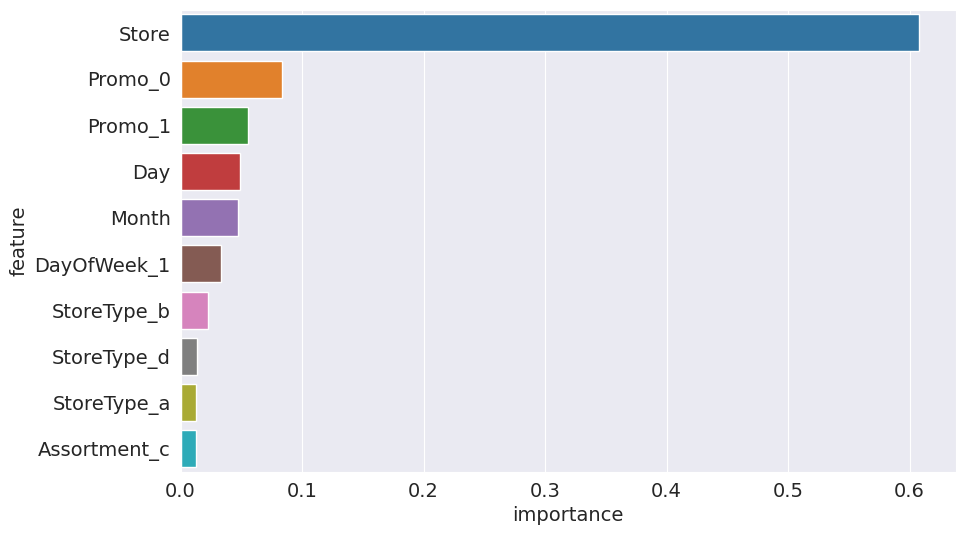

In [ ]:
sns.barplot(importance_df.head(10),x='importance',y='feature')

In [ ]:
def predict_input(model, single_input):
  if single_input['Open'] == 0:
    return 0
  input_df = pd.DataFrame([single_input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols+encoded_cols]
  pred = model.predict(X_input)[0]
  return pred

In [ ]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [ ]:
predict_input(rf,sample_input)

4170.5

In [ ]:
test_preds = rf.predict(X_test)
test_preds

array([ 4170.5,  7746.2,  8919.7, ...,  6100.6, 20353.4,  6688.5])

In [ ]:
submission_df = pd.read_csv('/content/rossmann-store-sales/sample_submission.csv')
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
submission_df['Sales']  = test_df['Open'].fillna(1).astype('int')*test_preds
submission_df

,Id,Sales
0,1,4170.5
1,2,7746.2
2,3,8919.7
3,4,6957.5
4,5,6362.5
...,...,...
41083,41084,3129.8
41084,41085,8361.8
41085,41086,6100.6
41086,41087,20353.4


In [ ]:
submission_df.to_csv('submission.csv',index=None)

In [ ]:
!head submission.csv

Id,Sales
1,4170.5
2,7746.2
3,8919.7
4,6957.5
5,6362.5
6,5682.7
7,8229.6
8,8398.9
9,5985.5


# **Conclusion**
We have successfully built various Linear Models along with some Tree based Models and implemented them to predict sales.